In [54]:
from src import test_read as tr
from src import process
from src import Periodicity_Intensity as pi

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
class visualizer:
    def __init__(self):
        self.data_holder = []
        self.data_holder2 = []
    def append_data(self,data):
        self.data_holder.append(data)
    def append_data2(self,data):
        self.data_holder2.append(data)
    def visualize(self,y_range):
        num_fig = len(self.data_holder)
        fig = plt.figure(figsize=(12,10))
        tmp_sub = num_fig*100+20
        for i in range(num_fig):
            tmp_data = self.data_holder[i]
            ax = fig.add_subplot(tmp_sub+i+1)
            ax.plot(np.arange(tmp_data.size), tmp_data, 'r-')
            ax.set_ylim(y_range)
            if len(self.data_holder2) != 0:
                tmp_data = self.data_holder2[i]
                ax.plot(np.arange(tmp_data.size), tmp_data, 'b-')
                print onlyfiles[i],np.corrcoef(self.data_holder[i],tmp_data)[0,1]
                
def start(onlyfiles):
    raw_visualizer = visualizer()
    norm_visualizer = visualizer()
    autocor_visualizer = visualizer()
    autocor_biased_visualizer = visualizer()
    
    for file_name, fp_data, fp_imputation,data_shape,first_day_date,date_list,last_day_date in tr.read_memmap(onlyfiles):
        file_name = file_name.split('_')[0]
        print file_name, fp_data.shape, np.sum(fp_imputation)
        fp_data,nan_count = process.set_nan_to_zeros(fp_data)
        if fp_data.shape[0]%2 != 0:
            fp_data = fp_data[0:fp_data.shape[0]-1]
            fp_imputation = fp_imputation[0:fp_imputation.shape[0]-1]
            print '!!!!!!!!!!!!!!!!!!!!!!!! remove last',fp_data.shape
    
        raw_visualizer.append_data(fp_data)
        tmp_processor = pi.FFT('CPU', fp_data, fs=1/5.0, target_fs=1/(24*3600.0))
        raw_visualizer.append_data2(tmp_processor.circadian_pattern)
    
        fp_data = process.normalize(fp_data)
        norm_visualizer.append_data(fp_data)

        d_biased, d_unbiased = process.autocorr(fp_data)
        autocor_visualizer.append_data(d_unbiased)
        tmp_processor = pi.FFT('CPU', d_unbiased, fs=1/5.0, target_fs=1/(24*3600.0))
        #print tmp_processor.circadian_pattern
        #plt.plot(tmp_processor.circadian_pattern)
        autocor_visualizer.append_data2(tmp_processor.circadian_pattern)
        
        autocor_biased_visualizer.append_data(d_biased)
        tmp_processor = pi.FFT('CPU', d_unbiased, fs=1/5.0, target_fs=1/(24*3600.0))
        autocor_biased_visualizer.append_data2(tmp_processor.circadian_pattern)
        
    return raw_visualizer,norm_visualizer,autocor_visualizer,autocor_biased_visualizer
    
    
    

# Comparing subject with same length

In [56]:
onlyfiles = ['5296172_90004_0_0','2529511_90004_0_0']
raw_visualizer,norm_visualizer,autocor_visualizer,autocor_biased_visualizer = start(onlyfiles)

5296172 (120960,) 1
2529511 (120960,) 0


5296172_90004_0_0 0.410365941952
2529511_90004_0_0 0.233022800012


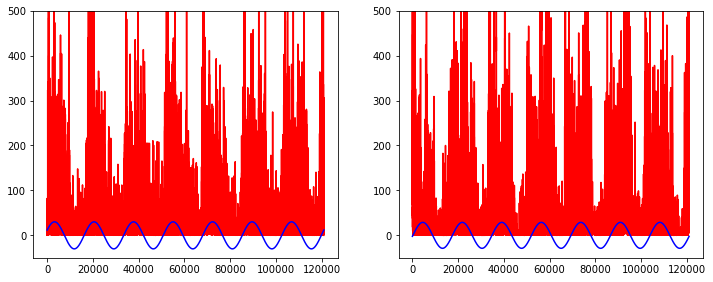

In [57]:
raw_visualizer.visualize(y_range=[-50,500])

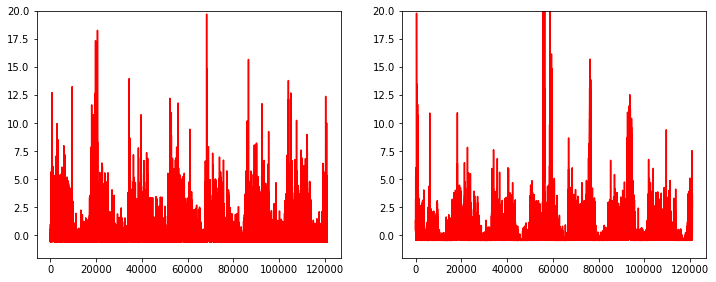

In [58]:
norm_visualizer.visualize(y_range=[-2,20])

5296172_90004_0_0 0.818718489506
2529511_90004_0_0 0.516236807858


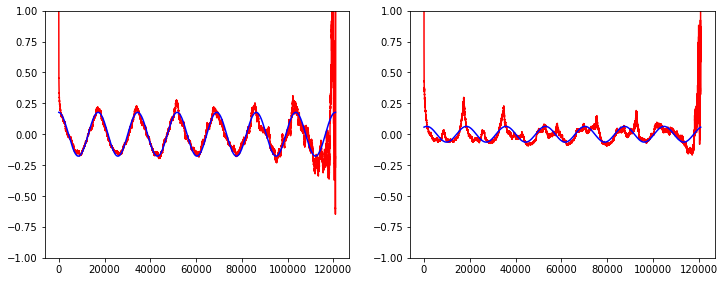

In [59]:
autocor_visualizer.visualize(y_range=[-1,1])

5296172_90004_0_0 0.831390349516
2529511_90004_0_0 0.48384238348


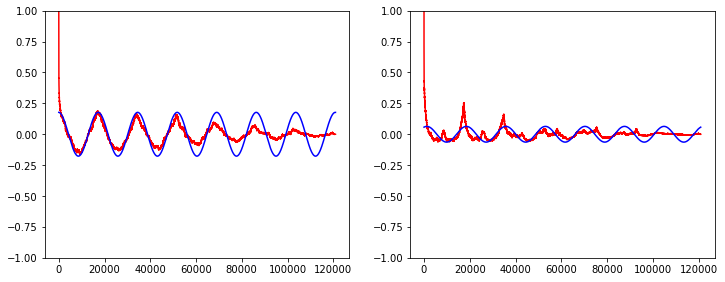

In [60]:
autocor_biased_visualizer.visualize(y_range=[-1,1])

In [61]:
onlyfiles = ['3500025_90004_0_0','2063391_90004_0_0']
raw_visualizer,norm_visualizer,autocor_visualizer,autocor_biased_visualizer = start(onlyfiles)

3500025 (67836,) 0
2063391 (120960,) 744


# Comparing subjects with different length

3500025_90004_0_0 0.331136283394
2063391_90004_0_0 0.280308217183


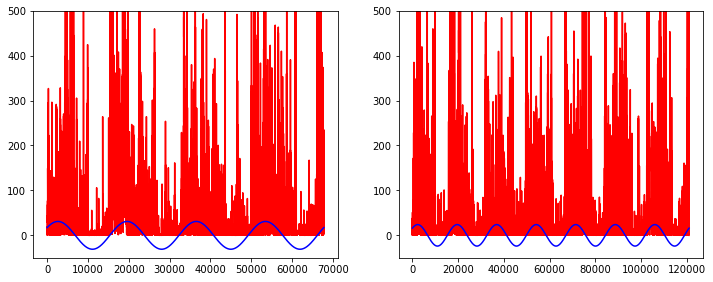

In [62]:
raw_visualizer.visualize(y_range=[-50,500])

3500025_90004_0_0 0.647812491535
2063391_90004_0_0 0.634133004266


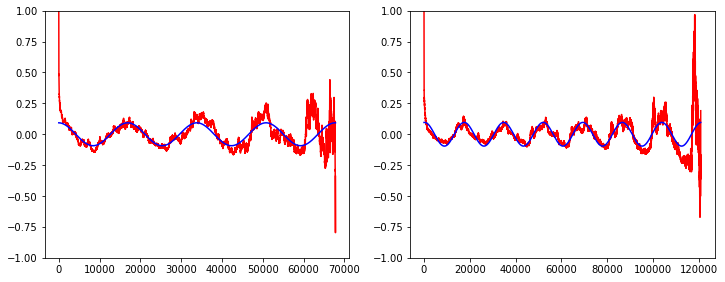

In [63]:
autocor_visualizer.visualize(y_range=[-1,1])